In [ ]:
import umap 
import sklearn.datasets
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import trimap

###   t-SNE, UMAP and LargeVis

In this and the next notebook we will use manifold learning for data visualization of large data sets (with high dimensionality). In addition to t-SNE, two relatively new methods will be used that are more efficient on large data sets.


- UMAP (Uniform Manifold Approximation and Projection) - Install this Python package: https://umap-learn.readthedocs.io/en/latest/index.html. UMAP package is compatible with scikit-learn, making use of the same API and able to be added to sklearn pipelines. UMAP can work as a drop in replacement for t-SNE and other dimension reduction classes from scikit-learn


- LargeVis (Visualizing Large-scale and High-dimensional Data) - Many techniques (like t-SNE, UMAP and LargeVis) first compute a similarity structure of the data points and then project them into a low-dimensional space with the structure preserved. These two steps suffer from considerable computational costs Comparing to tSNE, LargeVis significantly reduces the computational cost of the graph construction step and employs a principled probabilistic model for the visualization step, the objective of which can be effectively optimized through asynchronous stochastic gradient descent with a linear time complexity. Download this algorithm repository and follow the installation instructions. https://github.com/lferry007/LargeVis


In [ ]:
from sklearn.manifold import TSNE
import umap

To get data we use the sklearn.datasets.fetch_openml method, which as the name requires, Fetch dataset from openml by name or dataset id. We will use MNIST and Fashion-MNIST(Zalando's article images). Fashion-MNIST is intended to serve as a direct drop-in replacement for the original MNIST dataset for benchmarking machine learning algorithms. Instead of numbers it contains thumbnails of clothes images.

In [ ]:
mnist = sklearn.datasets.fetch_openml('mnist_784')
fmnist = sklearn.datasets.fetch_openml('Fashion-MNIST')

/usr/local/lib/python3.9/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


Below are drawings of some samples from mnist and fmnist data sets

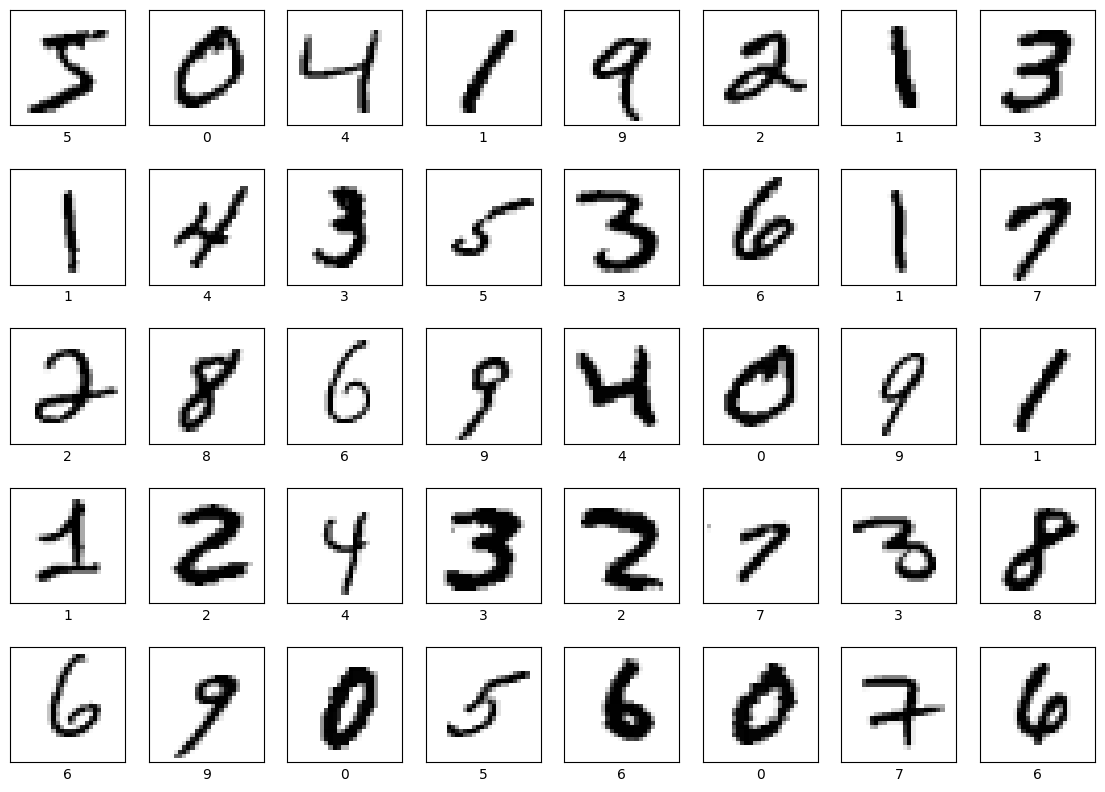

In [ ]:
mnist_names = [i for i in range(10)]
 
plt.figure(figsize=(14,10))
for i in range(40):
    plt.subplot(5, 8, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(np.array(mnist.data)[i].reshape((28, 28)), cmap=plt.cm.binary)
    plt.xlabel(np.array(mnist_names)[int(mnist.target[i])])
plt.show()

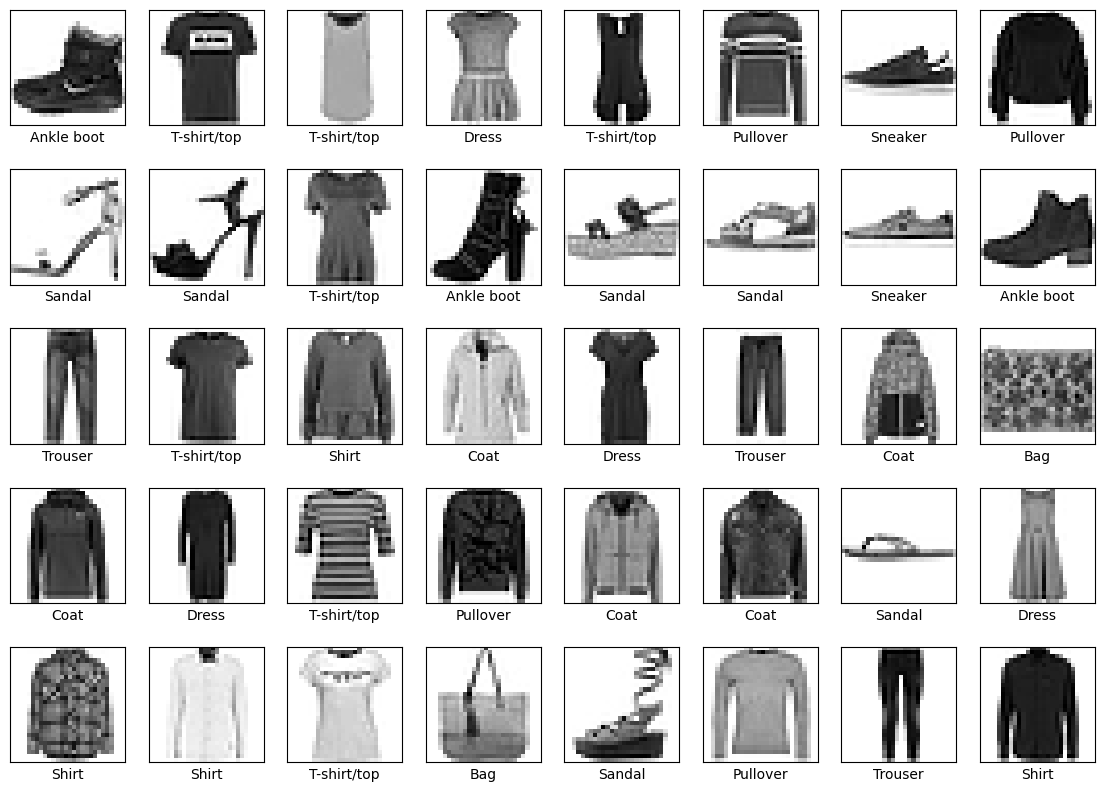

In [ ]:
fmnist_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
 
plt.figure(figsize=(14,10))
for i in range(40):
    plt.subplot(5, 8, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(np.array(fmnist.data)[i].reshape((28, 28)), cmap=plt.cm.binary)
    plt.xlabel(np.array(fmnist_names)[int(fmnist.target[i])])
plt.show()

#### Use t-SNE, UMAP and LargeVis to project mnist and fmnist data sets into a 2-dimensional space. For LargeVis, you need to create a function that saves the data to the required by LargeVis txt file format, and a function that loads the resulting file. Draw charts for all visualizations.

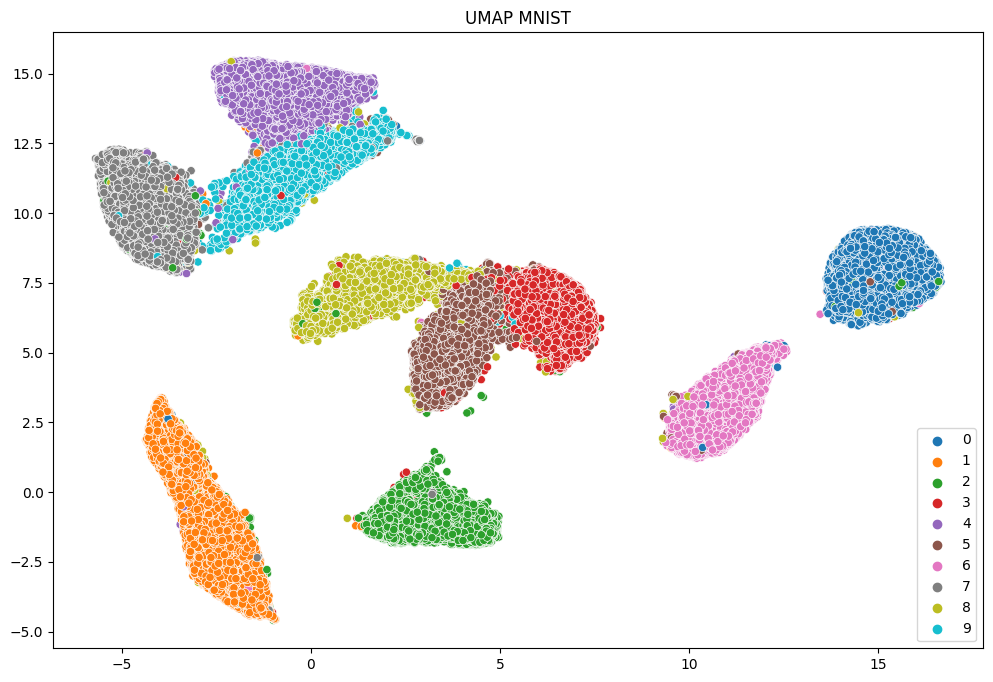

In [ ]:
#umap
from umap import UMAP
mnist_umap = UMAP(n_components = 2).fit_transform(mnist.data)
plt.figure(figsize=(12, 8))
sns.scatterplot(x = mnist_umap[:, 0], y = mnist_umap[:, 1], hue = mnist.target, palette = 'tab10', legend = 'full')
plt.legend(loc='lower right')
plt.title("UMAP MNIST")
plt.show()

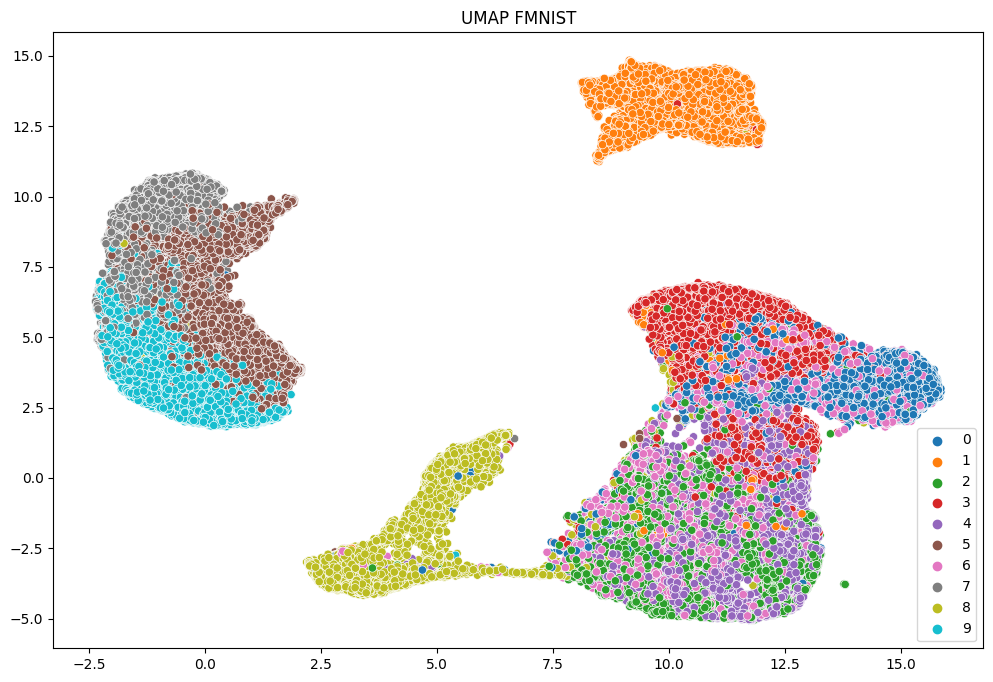

In [ ]:
fmnist_umap = UMAP(n_components = 2).fit_transform(fmnist.data)
plt.figure(figsize=(12, 8))
sns.scatterplot(x = fmnist_umap[:, 0], y = fmnist_umap[:, 1], hue = fmnist.target, palette = 'tab10', legend = 'full')
plt.legend(loc='lower right')
plt.title("UMAP FMNIST")
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
mnist_scaled = scaler.fit_transform(mnist.data)
fmnist_scaled = scaler.fit_transform(fmnist.data)

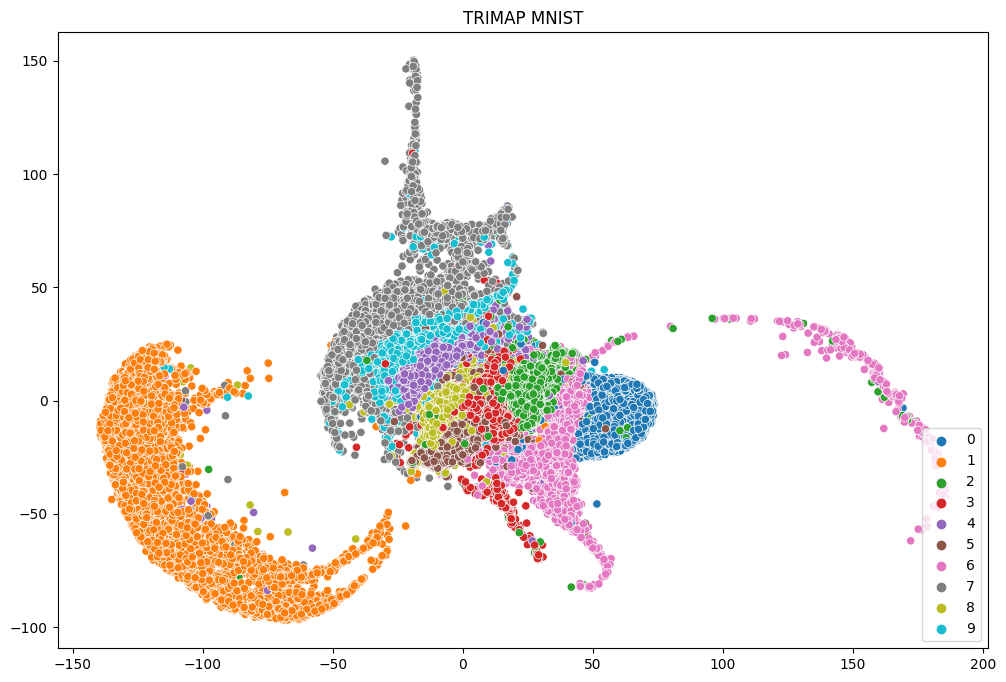

In [ ]:
#trimap
mnist_trimap = trimap.TRIMAP().fit_transform(mnist_scaled)
plt.figure(figsize=(12, 8))
sns.scatterplot(x = mnist_trimap[:, 0], y = mnist_trimap[:, 1], hue = mnist.target, palette = 'tab10', legend = 'full')
plt.legend(loc='lower right')
plt.title("TRIMAP MNIST")
plt.show()

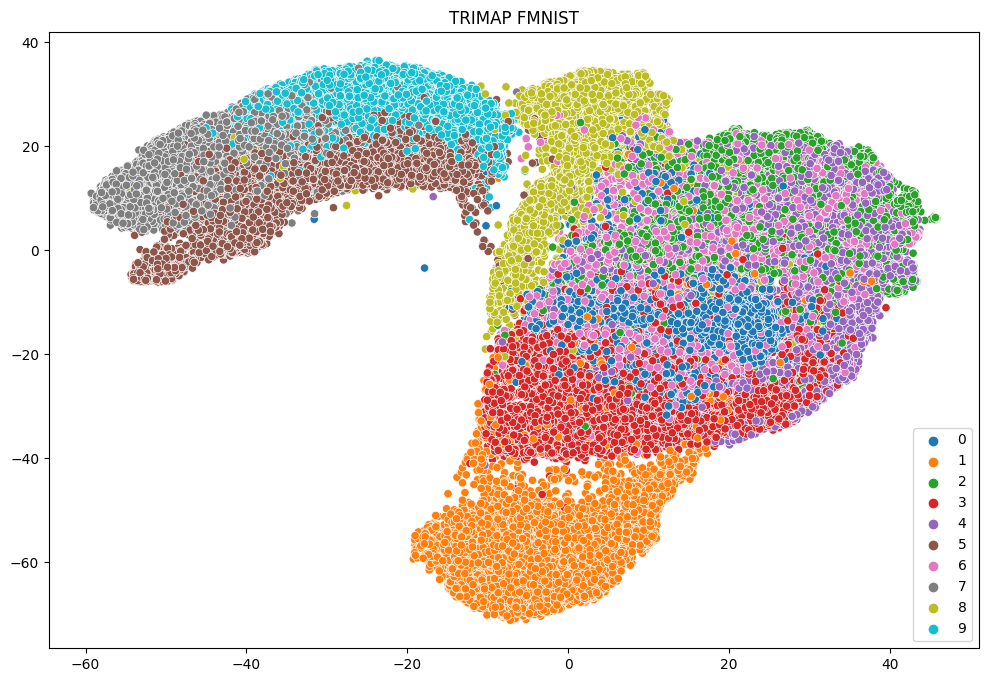

In [ ]:
fmnist_scaled = scaler.fit_transform(fmnist.data)
fmnist_trimap = trimap.TRIMAP().fit_transform(fmnist_scaled)
plt.figure(figsize=(12, 8))
sns.scatterplot(x = fmnist_trimap[:, 0], y = fmnist_trimap[:, 1], hue = fmnist.target, palette = 'tab10', legend = 'full')
plt.legend(loc='lower right')
plt.title("TRIMAP FMNIST")
plt.show()

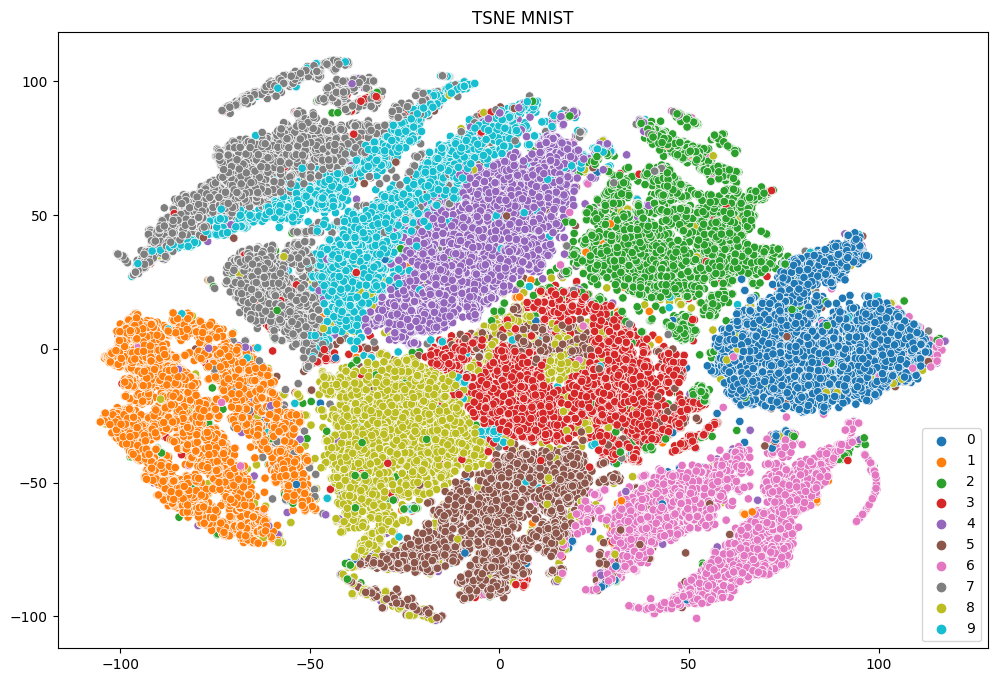

In [ ]:
#tsne
from sklearn.manifold import TSNE
mnist_tsne = TSNE(n_components=2, random_state=42).fit_transform(mnist_scaled)
plt.figure(figsize=(12, 8))
sns.scatterplot(x = mnist_tsne[:, 0], y = mnist_tsne[:, 1], hue = mnist.target, palette = 'tab10', legend = 'full')
plt.legend(loc='lower right')
plt.title("TSNE MNIST")
plt.show()

In [ ]:
fmnist_tsne = TSNE(n_components=2, random_state=42).fit_transform(fmnist_scaled)
plt.figure(figsize=(12, 8))
sns.scatterplot(x = fmnist_tsne[:, 0], y = fmnist_tsne[:, 1], hue = fmnist.target, palette = 'tab10', legend = 'full')
plt.legend(loc='lower right')
plt.title("TSNE FMNIST")
plt.show()

#### In order to compare the results of these three methods, calculate for each case the average distance between two points belonging to the same class divided by the average distance between points belonging to 2 different classes

In [ ]:
from sklearn.metrics import pairwise_distances
import numpy as np

def distances(data, target):
  distance = pairwise_distances(data)
  same_class = distance[np.where(target[:, np.newaxis] == target)[0], np.where(target[:, np.newaxis] == target)[1]]
  same_class_mean = np.mean(same_class)
  diff_class = distance[np.where(target[:, np.newaxis] != target)]
  diff_class_mean = np.mean(diff_class)
  score = same_class_mean / diff_class_mean
  return score


In [ ]:
print("Umap Mnist: ", distances(mnist_umap[:5000, :], mnist.target[:5000].values.ravel()))
print("Umap FMnist: ", distances(fmnist_umap[:5000, :], fmnist.target[:5000].values.ravel()))
print("Trimap Mnist: ", distances(mnist_trimap[:5000, :], mnist.target[:5000].values.ravel()))
print("Trimap FMnist: ", distances(fmnist_trimap[:5000, :], fmnist.target[:5000].values.ravel()))
print("TSNE Mnist: ", distances(mnist_tsne[:5000, :], mnist.target[:5000].values.ravel()))
print("TSNE FMnist: ", distances(fmnist_tsne[:5000, :], fmnist.target[:5000].values.ravel()))

Umap Mnist:  0.19724452
Umap FMnist:  0.273927
Trimap Mnist:  0.3742186
Trimap FMnist:  0.33341688
TSNE Mnist:  0.39499038
TSNE FMnist:  0.4279956


Dla zbioru danych mnist najlepsze wyniki w tej metryce uzyskuje wizualizacja za pomocą metody umap, zaś najgorsze za pomocą TSNE. Analogiczne wyniki uzyskano dla zbioru danych fmnist. Można tłumaczyć to faktem, że TSNE to metoda, która zaburza odległości między klasami i skupia się na relacjach między obeserwacjami będącymi w niewielkiej odległości od siebie.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

from scipy.spatial.distance import squareform, pdist
from sklearn.model_selection import train_test_split

markers = ["x", "o", "s", "*", "^", ".", "X"]
colors = ["red", "blue", "green", "brown", "orange", "cyan", "grey", "purple"]


def knngain(d_hd, d_ld, labels):
    # Number of data points
    N = d_hd.shape[0]
    N_1 = N - 1
    k_hd = np.zeros(shape=N_1, dtype=np.int64)
    k_ld = np.zeros(shape=N_1, dtype=np.int64)
    # For each data point
    for i in range(N):
        c_i = labels[i]
        di_hd = d_hd[i, :].argsort(kind="mergesort")
        di_ld = d_ld[i, :].argsort(kind="mergesort")
        # Making sure that i is first in di_hd and di_ld
        for arr in [di_hd, di_ld]:
            for idj, j in enumerate(arr):
                if j == i:
                    idi = idj
                    break
            if idi != 0:
                arr[idi] = arr[0]
            arr = arr[1:]
        for k in range(N_1):
            if c_i == labels[di_hd[k]]:
                k_hd[k] += 1
            if c_i == labels[di_ld[k]]:
                k_ld[k] += 1
    # Computing the KNN gain
    gn = (k_ld.cumsum() - k_hd.cumsum()).astype(np.float64) / (
        (1.0 + np.arange(N_1)) * N
    )
    print("GN: ", gn)
    print("AUC: ", eval_auc(gn))
    # Returning the KNN gain and its AUC
    return gn, eval_auc(gn)



def eval_auc(arr):
    i_all_k = 1.0 / (np.arange(arr.size) + 1.0)
    return np.float64(arr.dot(i_all_k)) / (i_all_k.sum())

def eval_rnx(Q):
    N_1 = Q.shape[0]
    N = N_1 + 1
    # Computing Q_NX
    qnxk = np.empty(shape=N_1, dtype=np.float64)
    acc_q = 0.0
    for K in range(N_1):
        acc_q += Q[K, K] + np.sum(Q[K, :K]) + np.sum(Q[:K, K])
        qnxk[K] = acc_q / ((K + 1) * N)
    # Computing R_NX
    arr_K = np.arange(N_1)[1:].astype(np.float64)
    rnxk = (N_1 * qnxk[: N_1 - 1] - arr_K) / (N_1 - arr_K)
    # Returning
    return rnxk


def eval_dr_quality(d_hd, d_ld):
    # Computing the co-ranking matrix of the embedding, and the R_{NX}(K) curve.
    rnxk = eval_rnx(Q=coranking(d_hd=d_hd, d_ld=d_ld))
    # Computing the AUC, and returning.
    return rnxk, eval_auc(rnxk)


def coranking(d_hd, d_ld):
    # Computing the permutations to sort the rows of the distance matrices in HDS and LDS.
    perm_hd = d_hd.argsort(axis=-1, kind="mergesort")
    perm_ld = d_ld.argsort(axis=-1, kind="mergesort")

    N = d_hd.shape[0]
    i = np.arange(N, dtype=np.int64)
    # Computing the ranks in the LDS
    R = np.empty(shape=(N, N), dtype=np.int64)
    for j in range(N):
        R[perm_ld[j, i], j] = i
    # Computing the co-ranking matrix
    Q = np.zeros(shape=(N, N), dtype=np.int64)
    for j in range(N):
        Q[i, R[perm_hd[j, i], j]] += 1
    # Returning
    return Q[1:, 1:]


def viz_qa(
    Ly,
    ymin=None,
    ymax=None,
    Lmarkers=None,
    Lcols=None,
    Lleg=None,
    Lls=None,
    Lmedw=None,
    Lsdots=None,
    lw=2,
    markevery=0.1,
    tit="",
    folder_name="",
    xlabel="",
    ylabel="",
    alpha_plot=0.9,
    alpha_leg=0.8,
    stit=25,
    sax=20,
    sleg=15,
    zleg=1,
    loc_leg="best",
    ncol_leg=1,
    lMticks=10,
    lmticks=5,
    wMticks=2,
    wmticks=1,
    nyMticks=11,
    mymticks=4,
    grid=True,
    grid_ls="solid",
    grid_col="lightgrey",
    grid_alpha=0.7,
    xlog=True,
):
    # Number of curves
    nc = len(Ly)
    # Checking the parameters
    if ymin is None:
        ymin = np.min(np.asarray([arr.min() for arr in Ly]))
    if ymax is None:
        ymax = np.max(np.asarray([arr.max() for arr in Ly]))
    if Lmarkers is None:
        Lmarkers = ["x"] * nc
    if Lcols is None:
        Lcols = ["blue"] * nc
    if Lleg is None:
        Lleg = [None] * nc
        add_leg = False
    else:
        add_leg = True
    if Lls is None:
        Lls = ["solid"] * nc
    if Lmedw is None:
        Lmedw = [float(lw) / 2.0] * nc
    if Lsdots is None:
        Lsdots = [12] * nc

    # Setting the limits of the y-axis
    y_lim = [ymin, ymax]

    # Defining the ticks on the y-axis
    yMticks = np.linspace(
        start=ymin, stop=ymax, num=nyMticks, endpoint=True, retstep=False
    )
    ymticks = np.linspace(
        start=ymin,
        stop=ymax,
        num=1 + mymticks * (nyMticks - 1),
        endpoint=True,
        retstep=False,
    )
    yMticksLab = [int(round(v * 100.0)) / 100.0 for v in yMticks]

    # Initial values for xmin and xmax
    xmin, xmax = 1, -np.inf

    fig = plt.figure(figsize=(16, 12))
    ax = fig.add_subplot(111)
    if xlog:
        fplot = ax.semilogx
    else:
        fplot = ax.plot

    # Plotting the data
    for id, y in enumerate(Ly):
        x = np.arange(start=1, step=1, stop=y.size + 0.5, dtype=np.int64)
        xmax = max(xmax, x[-1])
        fplot(
            x,
            y,
            label=Lleg[id],
            alpha=alpha_plot,
            color=Lcols[id],
            linestyle=Lls[id],
            lw=lw,
            marker=Lmarkers[id],
            markeredgecolor=Lcols[id],
            markeredgewidth=Lmedw[id],
            markersize=Lsdots[id],
            dash_capstyle="round",
            solid_capstyle="round",
            dash_joinstyle="round",
            solid_joinstyle="round",
            markerfacecolor=Lcols[id],
            markevery=markevery,
        )

    # Setting the limits of the axes
    ax.set_xlim([xmin, xmax])
    ax.set_ylim(y_lim)

    # Setting the major and minor ticks on the y-axis
    ax.set_yticks(yMticks, minor=False)
    ax.set_yticks(ymticks, minor=True)
    ax.set_yticklabels(yMticksLab, minor=False, fontsize=sax)

    # Defining the legend
    if add_leg:
        leg = ax.legend(
            loc=loc_leg,
            fontsize=sleg,
            markerfirst=True,
            fancybox=True,
            framealpha=alpha_leg,
            ncol=ncol_leg,
        )
        if zleg is not None:
            leg.set_zorder(zleg)

    # Setting the size of the ticks labels on the x axis
    for tick in ax.xaxis.get_major_ticks():
        tick.label.set_fontsize(sax)

    # Setting ticks length and width
    ax.tick_params(axis="both", length=lMticks, width=wMticks, which="major")
    ax.tick_params(axis="both", length=lmticks, width=wmticks, which="minor")

    # Setting the positions of the labels
    ax.xaxis.set_tick_params(labelright=False, labelleft=True)
    ax.yaxis.set_tick_params(labelright=False, labelleft=True)

    # Adding the grids
    if grid:
        ax.xaxis.grid(
            True, linestyle=grid_ls, which="major", color=grid_col, alpha=grid_alpha
        )
        ax.yaxis.grid(
            True, linestyle=grid_ls, which="major", color=grid_col, alpha=grid_alpha
        )
    ax.set_axisbelow(True)

    ax.set_title(tit, fontsize=stit)
    ax.set_xlabel(xlabel, fontsize=sax)
    ax.set_ylabel(ylabel, fontsize=sax)
    # plt.tight_layout()


class LocalMetric:
    def __init__(self):
        self.L_rnx = []
        self.L_kg = []
        self.Lleg_rnx = []
        self.Lleg_kg = []
        self.Lls = []
        self.number_of_methods = 0

    def calculate_knn_gain_and_dr_quality(
        self,
        X_lds: np.ndarray,
        X_hds: np.ndarray,
        labels: np.ndarray,
        method_name: str,
    ):

        (
            X_hds_train,
            X_hds_test,
            X_lds_train,
            X_lds_test,
            labels_train,
            labels_test,
        ) = train_test_split(X_hds, X_lds, labels, test_size=0.15)

        print("Calculating d_hd")
        d_hd = squareform(X=pdist(X=X_hds_test, metric="euclidean"), force="tomatrix")

        print(method_name)
        d_ld = squareform(X=pdist(X=X_lds_test, metric="euclidean"), force="tomatrix")
        rnxk, auc_rnx = eval_dr_quality(d_hd=d_hd, d_ld=d_ld)
        kg, auc_kg = knngain(d_hd=d_hd, d_ld=d_ld, labels=labels_test)

        self.L_rnx.append(rnxk)
        self.L_kg.append(kg)
        self.Lleg_rnx.append(
            "{} {}".format(int(round(auc_rnx * 1000)) / 1000.0, method_name)
        )
        self.Lleg_kg.append(
            "{} {}".format(int(round(auc_kg * 1000)) / 1000.0, method_name)
        )
        self.Lls.append("solid")
        self.number_of_methods = self.number_of_methods + 1

    def visualize(self):
        Lmarkers = random.sample(markers, self.number_of_methods)
        Lcols = random.sample(colors, self.number_of_methods)
        Lmedw = [1.0] * self.number_of_methods
        Lsdots = [12] * self.number_of_methods

        viz_qa(
            Ly=self.L_rnx,
            Lmarkers=Lmarkers,
            Lcols=Lcols,
            Lleg=self.Lleg_rnx,
            Lls=self.Lls,
            Lmedw=Lmedw,
            Lsdots=Lsdots,
            tit="DR quality",
            xlabel="Neighborhood size $K$",
            ylabel="$R_{NX}(K)$",
        )

        viz_qa(
            Ly=self.L_kg,
            Lmarkers=Lmarkers,
            Lcols=Lcols,
            Lleg=self.Lleg_kg,
            Lls=self.Lls,
            Lmedw=Lmedw,
            Lsdots=Lsdots,
            tit="KNN gain",
            xlabel="Neighborhood size $K$",
            ylabel="$G_{NN}(K)$",
        )

        print("Finished.")


In [ ]:
local_metrics = LocalMetric()
local_metrics.calculate_knn_gain_and_dr_quality(
X_lds=mnist_umap[:5000, :],
X_hds=mnist.data[:5000],
labels=mnist.target[:5000].values.ravel(),
method_name="{} {}".format("mnist", "umap"),
)

Calculating d_hd
mnist umap
GN:  [0.00000000e+00 3.06666667e-02 5.77777778e-02 7.96666667e-02
 9.44000000e-02 1.14666667e-01 1.29142857e-01 1.41500000e-01
 1.55111111e-01 1.64533333e-01 1.73939394e-01 1.81666667e-01
 1.92000000e-01 1.99904762e-01 2.09777778e-01 2.18583333e-01
 2.26196078e-01 2.32074074e-01 2.38526316e-01 2.44933333e-01
 2.52825397e-01 2.59757576e-01 2.65739130e-01 2.72111111e-01
 2.77706667e-01 2.82256410e-01 2.88395062e-01 2.92952381e-01
 2.97701149e-01 3.02400000e-01 3.07139785e-01 3.11958333e-01
 3.16565657e-01 3.20745098e-01 3.24990476e-01 3.29629630e-01
 3.34018018e-01 3.38280702e-01 3.42427350e-01 3.46033333e-01
 3.49495935e-01 3.54317460e-01 3.57798450e-01 3.61969697e-01
 3.66014815e-01 3.68782609e-01 3.72170213e-01 3.75166667e-01
 3.78176871e-01 3.80853333e-01 3.83869281e-01 3.86102564e-01
 3.88427673e-01 3.90617284e-01 3.92993939e-01 3.95309524e-01
 3.97403509e-01 3.99977011e-01 4.01514124e-01 4.03311111e-01
 4.04568306e-01 4.05935484e-01 4.07386243e-01 4.0812

In [ ]:
local_metrics.calculate_knn_gain_and_dr_quality(
X_lds=fmnist_umap[:5000, :],
X_hds=fmnist.data[:5000],
labels=fmnist.target[:5000].values.ravel(),
method_name="{} {}".format("fmnist", "umap"),
)

Calculating d_hd
fmnist umap
GN:  [ 0.00000000e+00 -1.33333333e-02  6.22222222e-03  1.33333333e-02
  1.17333333e-02  1.88888889e-02  2.22857143e-02  2.55000000e-02
  2.53333333e-02  2.70666667e-02  2.82424242e-02  3.14444444e-02
  3.43589744e-02  3.37142857e-02  3.73333333e-02  3.89166667e-02
  4.10980392e-02  4.18518519e-02  4.30175439e-02  4.35333333e-02
  4.34920635e-02  4.31515152e-02  4.35942029e-02  4.61666667e-02
  4.75200000e-02  5.01538462e-02  5.07160494e-02  5.33809524e-02
  5.60000000e-02  5.85333333e-02  6.02150538e-02  6.24583333e-02
  6.40404040e-02  6.46666667e-02  6.61714286e-02  6.86296296e-02
  6.98378378e-02  7.10526316e-02  7.10085470e-02  7.04666667e-02
  7.13821138e-02  7.22539683e-02  7.43565891e-02  7.49696970e-02
  7.68592593e-02  7.82318841e-02  7.94609929e-02  8.08888889e-02
  8.16326531e-02  8.30133333e-02  8.37385621e-02  8.43333333e-02
  8.50062893e-02  8.56543210e-02  8.57696970e-02  8.53333333e-02
  8.58947368e-02  8.64827586e-02  8.67796610e-02  8.7844

In [ ]:
local_metrics.calculate_knn_gain_and_dr_quality(
X_lds=mnist_trimap[:5000, :],
X_hds=mnist.data[:5000],
labels=mnist.target[:5000].values.ravel(),
method_name="{} {}".format("mnist", "trimap"),
)

Calculating d_hd
mnist trimap
GN:  [ 0.00000000e+00 -4.13333333e-02 -3.28888889e-02 -2.63333333e-02
 -1.17333333e-02 -1.77777778e-03  4.38095238e-03  1.33333333e-02
  2.38518519e-02  2.94666667e-02  3.72121212e-02  4.75555556e-02
  5.22051282e-02  5.70476190e-02  6.36444444e-02  6.70000000e-02
  7.23137255e-02  7.74814815e-02  8.03508772e-02  8.53333333e-02
  8.96507937e-02  9.40606061e-02  9.69855072e-02  1.00833333e-01
  1.04266667e-01  1.09076923e-01  1.11555556e-01  1.13000000e-01
  1.15540230e-01  1.18755556e-01  1.21161290e-01  1.23833333e-01
  1.27272727e-01  1.28470588e-01  1.30285714e-01  1.31814815e-01
  1.33945946e-01  1.36140351e-01  1.38769231e-01  1.40633333e-01
  1.42731707e-01  1.44634921e-01  1.46356589e-01  1.48545455e-01
  1.50281481e-01  1.51217391e-01  1.52765957e-01  1.54305556e-01
  1.55782313e-01  1.57706667e-01  1.59137255e-01  1.60153846e-01
  1.61232704e-01  1.61950617e-01  1.62690909e-01  1.63642857e-01
  1.64046784e-01  1.65195402e-01  1.65649718e-01  1.654

In [ ]:
local_metrics.calculate_knn_gain_and_dr_quality(
X_lds=fmnist_trimap[:5000, :],
X_hds=fmnist.data[:5000],
labels=fmnist.target[:5000].values.ravel(),
method_name="{} {}".format("fmnist", "trimap"),
)

Calculating d_hd
fmnist trimap
GN:  [ 0.00000000e+00 -3.33333333e-02 -2.53333333e-02 -1.53333333e-02
 -8.00000000e-03 -2.22222222e-03 -3.61904762e-03 -5.66666667e-03
  0.00000000e+00  4.13333333e-03  6.54545455e-03  7.55555556e-03
  8.82051282e-03  9.80952381e-03  1.11111111e-02  1.39166667e-02
  1.38823529e-02  1.60740741e-02  1.80350877e-02  2.10666667e-02
  2.26031746e-02  2.51515152e-02  2.73623188e-02  2.88888889e-02
  3.07200000e-02  3.18461538e-02  3.20493827e-02  3.46666667e-02
  3.55862069e-02  3.63111111e-02  3.84946237e-02  4.13333333e-02
  4.36363636e-02  4.46274510e-02  4.61333333e-02  4.69259259e-02
  4.84684685e-02  4.98596491e-02  4.98461538e-02  5.05666667e-02
  5.17073171e-02  5.32380952e-02  5.36744186e-02  5.39090909e-02
  5.47851852e-02  5.53043478e-02  5.64255319e-02  5.71944444e-02
  5.81768707e-02  5.81866667e-02  5.87189542e-02  5.87948718e-02
  5.94716981e-02  5.97530864e-02  5.99757576e-02  6.05238095e-02
  6.11695906e-02  6.19540230e-02  6.21242938e-02  6.26

In [ ]:
local_metrics.calculate_knn_gain_and_dr_quality(
X_lds=mnist_tsne[:5000, :],
X_hds=mnist.data[:5000],
labels=mnist.target[:5000].values.ravel(),
method_name="{} {}".format("mnist", "tsne"),
)

Calculating d_hd
mnist tsne
GN:  [ 0.00000000e+00 -8.00000000e-03 -9.77777778e-03 -1.30000000e-02
 -9.86666667e-03  1.55555556e-03  1.21904762e-02  1.68333333e-02
  2.23703704e-02  2.53333333e-02  3.28484848e-02  3.76666667e-02
  4.28717949e-02  4.61904762e-02  5.10222222e-02  5.57500000e-02
  6.14901961e-02  6.25185185e-02  6.32280702e-02  6.44666667e-02
  6.57777778e-02  6.81818182e-02  7.10144928e-02  7.33888889e-02
  7.55733333e-02  7.88205128e-02  8.13827160e-02  8.21904762e-02
  8.28045977e-02  8.53777778e-02  8.74408602e-02  8.96666667e-02
  9.40202020e-02  9.54901961e-02  9.65333333e-02  9.88518519e-02
  9.97477477e-02  1.01473684e-01  1.03179487e-01  1.04666667e-01
  1.06601626e-01  1.06920635e-01  1.08682171e-01  1.10787879e-01
  1.11940741e-01  1.13304348e-01  1.14070922e-01  1.15277778e-01
  1.16734694e-01  1.17573333e-01  1.18849673e-01  1.20256410e-01
  1.21132075e-01  1.21753086e-01  1.23224242e-01  1.24952381e-01
  1.25964912e-01  1.26919540e-01  1.27389831e-01  1.27955

In [ ]:
local_metrics.calculate_knn_gain_and_dr_quality(
X_lds=fmnist_tsne[:5000, :],
X_hds=fmnist.data[:5000],
labels=fmnist.target[:5000].values.ravel(),
method_name="{} {}".format("fmnist", "tsne"),
)

Calculating d_hd
fmnist tsne
GN:  [ 0.00000000e+00 -8.00000000e-03  7.11111111e-03  1.76666667e-02
  2.53333333e-02  2.71111111e-02  2.68571429e-02  3.03333333e-02
  3.05185185e-02  3.36000000e-02  3.50303030e-02  3.46666667e-02
  3.49743590e-02  3.11428571e-02  3.12000000e-02  3.03333333e-02
  3.09019608e-02  2.93333333e-02  2.75087719e-02  2.82666667e-02
  2.79365079e-02  2.64848485e-02  2.55652174e-02  2.56666667e-02
  2.43733333e-02  2.38974359e-02  2.38518519e-02  2.30476190e-02
  2.38620690e-02  2.41777778e-02  2.44731183e-02  2.32916667e-02
  2.25858586e-02  2.39215686e-02  2.39238095e-02  2.50370370e-02
  2.54414414e-02  2.55087719e-02  2.62222222e-02  2.60000000e-02
  2.59512195e-02  2.56825397e-02  2.67286822e-02  2.70909091e-02
  2.74370370e-02  2.82318841e-02  2.81418440e-02  2.87500000e-02
  2.88707483e-02  2.92000000e-02  3.01176471e-02  3.04871795e-02
  3.13962264e-02  3.20740741e-02  3.25818182e-02  3.24761905e-02
  3.31929825e-02  3.32643678e-02  3.29717514e-02  3.2777

<ipython-input-65-a4f0d0ac4e72>:228: MatplotlibDeprecationWarning: The label function was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use Tick.label1 instead.
  tick.label.set_fontsize(sax)


Finished.


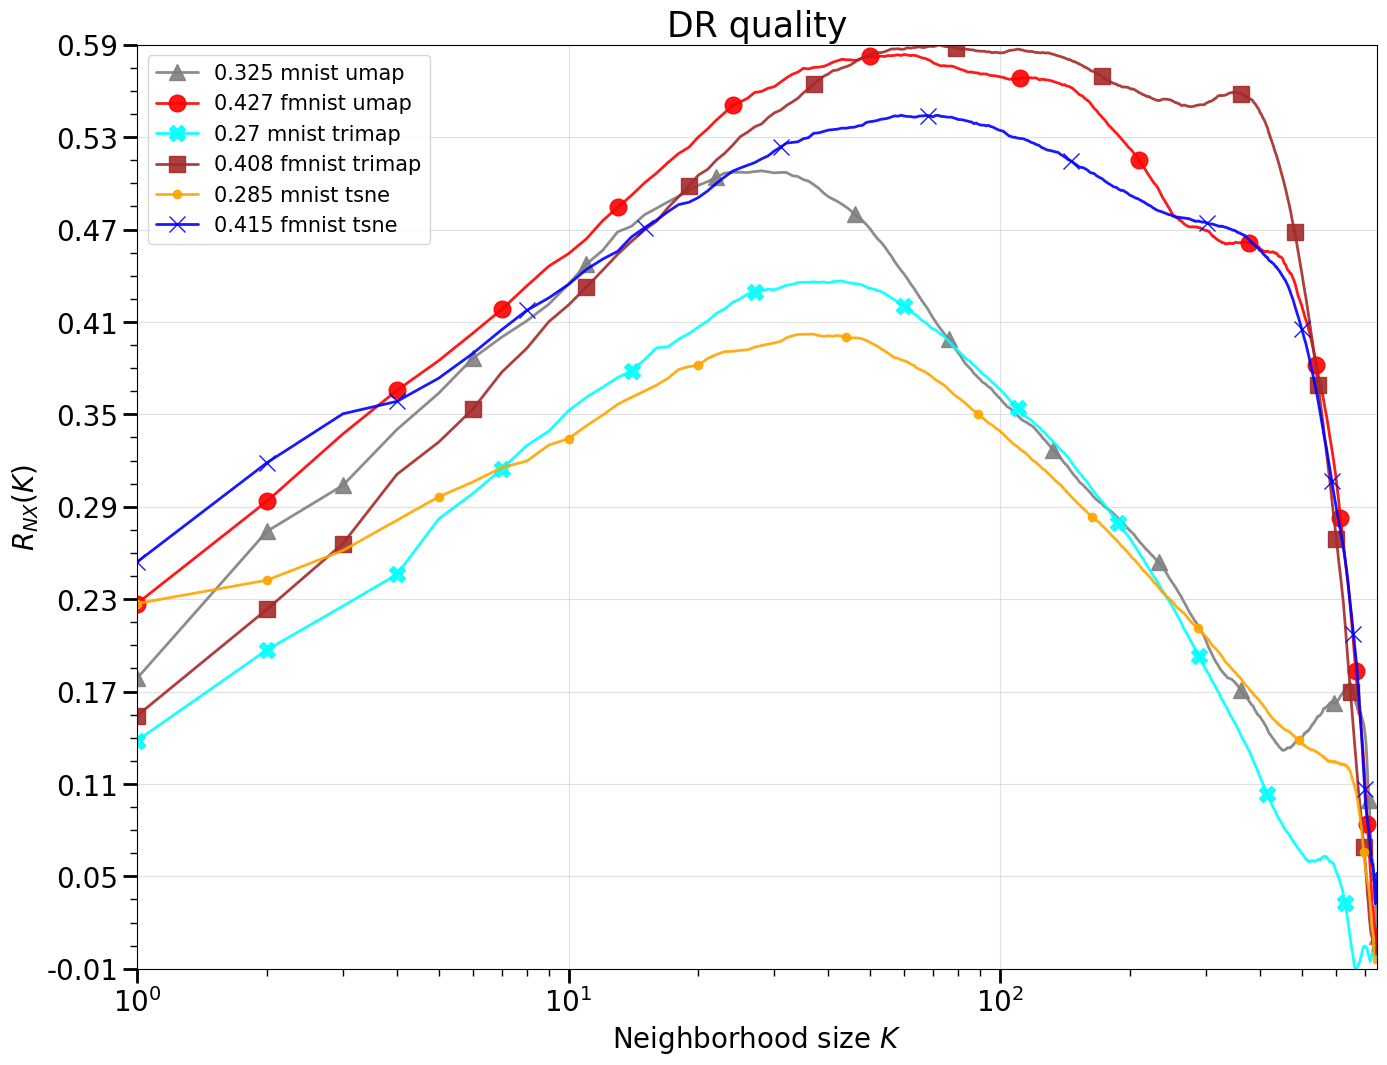

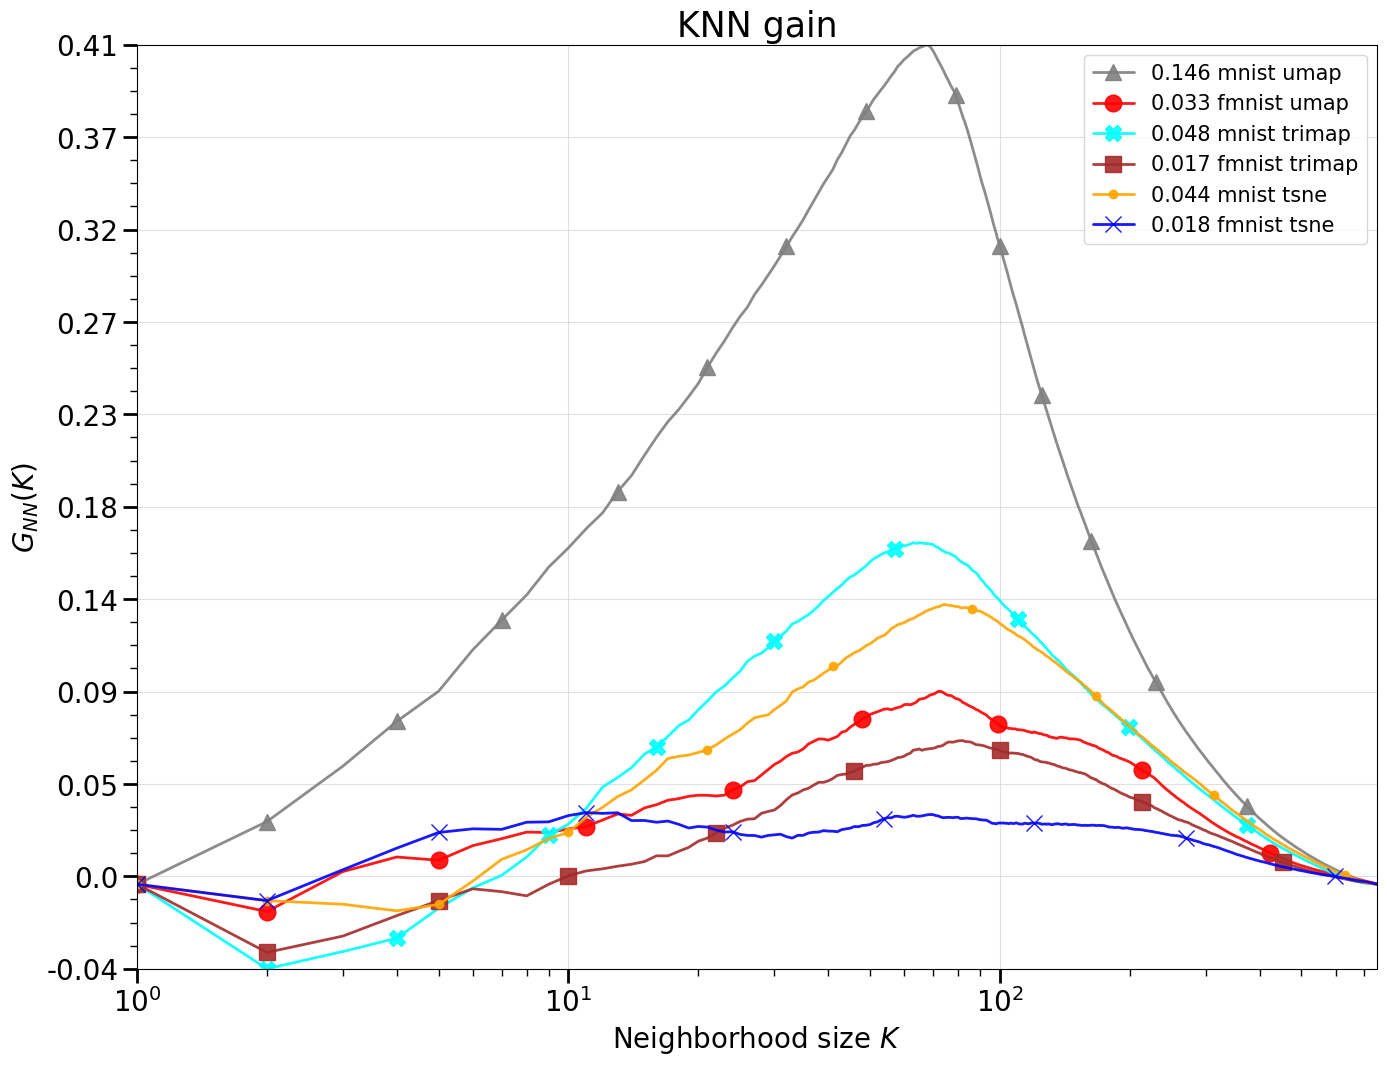

In [ ]:
local_metrics.visualize()

Na zbiorze danych fmnist trimap zachowuje relacje pomiędzy obserwacjami w największym sąsiedztwie, zaś najgorzej w zestawieniu wypada metoda TSNE.
W przypadku zbioru danych mnist, najwyższy wynik osiąga metoda umap na sąsiedztwie średniej wielkości, w przypadku większego sąsiedztwa wyniki działania wszystkich trzech algorytmów są porównywalne.

Dokładność klasyfikatora KNN znacznie wzrosła na zbiorze danych mnist przekształconym przez umap. Mniejszy, lecz wciąż widoczny wzrost można zaobserować również w przypadku trimap oraz tsne. 
Na zbiorze danych fmnist różnice w działaniu klasyfikatora na danych przekształconych nie są tak znaczące.
Dla większości krzywych można zauważyć spadek dokładności klasyfikatora w niewielkim sąsiedztwie. 